## Austin Animal Center Data Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#https://data.world/misohungry/austin-animal-shelter-intakes

In [6]:
animal = pd.read_csv('austin-animal-center-intakes-1.csv')

In [7]:
animal.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A748291,*Madison,05/01/2017 02:26:00 PM,05/01/2017 02:26:00 PM,S Pleasant Valley Rd And E Riverside Dr in Aus...,Stray,Normal,Dog,Intact Female,10 months,Pit Bull Mix,Black
1,A750529,NaN,05/28/2017 01:22:00 PM,05/28/2017 01:22:00 PM,8312 North Ih 35 in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Miniature Schnauzer Mix,White/Cream
2,A730601,NaN,07/07/2016 12:11:00 PM,07/07/2016 12:11:00 PM,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,7 months,Domestic Shorthair Mix,Blue Tabby
3,A748238,NaN,05/01/2017 10:53:00 AM,05/01/2017 10:53:00 AM,Airport Blvd And Oak Springs Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 years,Bichon Frise Mix,White
4,A683644,*Zoey,07/13/2014 11:02:00 AM,07/13/2014 11:02:00 AM,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,4 weeks,Border Collie Mix,Brown/White


In [8]:
animal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74788 entries, 0 to 74787
Data columns (total 12 columns):
Animal ID           74788 non-null object
Name                51646 non-null object
DateTime            74788 non-null object
MonthYear           74788 non-null object
Found Location      74788 non-null object
Intake Type         74788 non-null object
Intake Condition    74788 non-null object
Animal Type         74788 non-null object
Sex upon Intake     74787 non-null object
Age upon Intake     74788 non-null object
Breed               74788 non-null object
Color               74788 non-null object
dtypes: object(12)
memory usage: 6.8+ MB


In [10]:
animal.describe()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
count,74788,51646,74788,74788,74788,74788,74788,74788,74787,74788,74788,74788
unique,67875,14168,52809,52809,34329,5,8,5,5,46,2086,514
top,A706536,Bella,09/23/2016 12:00:00 PM,09/23/2016 12:00:00 PM,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White
freq,11,327,64,64,13190,52736,65609,42096,23896,13590,22395,7761


In [12]:
animal_cut2 = animal.sample(1000)
animal_cut2.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
36178,A713036,*Gordon,10/01/2015 07:12:00 PM,10/01/2015 07:12:00 PM,2501 Wickersham Ln in Austin (TX),Stray,Normal,Cat,Intact Male,6 months,Domestic Shorthair Mix,Blue Tabby
67157,A585779,Freddie Brew,06/28/2016 11:59:00 AM,06/28/2016 11:59:00 AM,Austin (TX),Public Assist,Normal,Dog,Neutered Male,7 years,German Shepherd Mix,Black/Tan
54646,A684013,*Emma,07/18/2014 01:00:00 PM,07/18/2014 01:00:00 PM,20906 Delorio St in Manor (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Shorthair Mix,Torbie/White
68652,A755775,Marley,08/08/2017 05:25:00 PM,08/08/2017 05:25:00 PM,3426 Greystone in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Redbone Hound Mix,Red
34325,A694476,Milo,12/29/2014 11:31:00 AM,12/29/2014 11:31:00 AM,2200 Webberwood Dr in Webberville (TX),Stray,Normal,Dog,Intact Male,10 months,Harrier,Tricolor


In [13]:
animal_cut = animal.sample(1000)

In [14]:
animal_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 33374 to 59640
Data columns (total 12 columns):
Animal ID           1000 non-null object
Name                693 non-null object
DateTime            1000 non-null object
MonthYear           1000 non-null object
Found Location      1000 non-null object
Intake Type         1000 non-null object
Intake Condition    1000 non-null object
Animal Type         1000 non-null object
Sex upon Intake     1000 non-null object
Age upon Intake     1000 non-null object
Breed               1000 non-null object
Color               1000 non-null object
dtypes: object(12)
memory usage: 101.6+ KB


In [15]:
count = 0
for index, i in enumerate(animal_cut['Age upon Intake']):
    split_i = i.split(' ')
    if split_i[1] == 'years' or split_i[1] == 'year':
        weeks = int(split_i[0]) * 48
    elif split_i[1] == 'months'or split_i[1] == 'month':
        weeks = int(split_i[0]) * 4
    elif split_i[1] == 'weeks' or split_i[1] == 'week':
        weeks = int(split_i[0])
    elif split_i[1] == 'day' or split_i[1] == 'days':
        weeks = int(split_i[0]) / 4
    else:
        count += 1
    animal_cut['Age upon Intake'].iloc[index] = weeks
animal_basic = animal

In [16]:
animal_cut = animal_cut.drop(['Animal ID', 'Name', 'MonthYear', 'DateTime', 'Found Location'], axis = 1)

In [17]:
animal_cut.head(10)

,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
33374,Stray,Sick,Cat,Intact Female,4,Domestic Shorthair Mix,Brown Tabby/White
61540,Stray,Injured,Dog,Neutered Male,624,Pug Mix,Black/Gray
7108,Owner Surrender,Normal,Cat,Intact Male,48,Domestic Shorthair Mix,Orange Tabby
65146,Stray,Nursing,Cat,Intact Male,4,Domestic Longhair Mix,Black/White
7106,Stray,Normal,Dog,Intact Female,28,Boston Terrier Mix,Black/White
45135,Stray,Normal,Dog,Neutered Male,48,Plott Hound Mix,Brown Brindle/White
72500,Stray,Aged,Dog,Spayed Female,336,Chow Chow Mix,Black
65559,Stray,Normal,Dog,Intact Male,48,Miniature Poodle Mix,White
9980,Stray,Normal,Cat,Intact Male,144,Maine Coon Mix,Brown Tabby
64235,Owner Surrender,Normal,Dog,Intact Male,8,Chihuahua Shorthair Mix,Black/Tan


In [18]:
animal_cut['Animal Type'].value_counts()

Dog      546
Cat      399
Other     52
Bird       3
Name: Animal Type, dtype: int64

In [19]:
Color_count = animal_cut['Color'].value_counts()

In [20]:
Color_list = Color_count[animal_cut['Color'].value_counts() < 5].index

In [21]:
for index, i in enumerate(animal_cut['Color']):
    if i in Color_list:
        animal_cut['Color'].iloc[index] = 'Other'
animal_cut['Color'].value_counts()

Other                  148
Black                   94
Black/White             94
Brown Tabby             63
Brown                   42
Tan                     38
Tan/White               35
White                   32
Brown Tabby/White       31
Orange Tabby            28
Black/Tan               27
Brown/White             23
Tricolor                23
Blue Tabby              19
White/Black             19
Blue/White              18
Orange Tabby/White      17
Black/Brown             17
Tortie                  16
Torbie                  15
Brown Brindle           15
White/Brown             15
Brown Brindle/White     14
Calico                  14
Brown/Black             14
Red/White               14
Blue                    14
White/Tan               11
Red                     11
Tan/Black               11
Gray                    10
Sable                    9
Cream Tabby              9
Blue Tabby/White         8
Lynx Point               8
Cream                    7
White/Brown Tabby        7
G

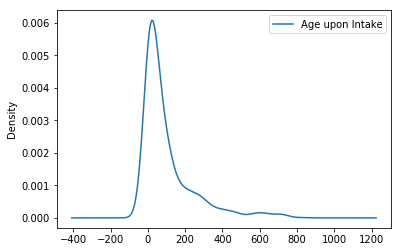

In [43]:
animal_cut.plot(kind = 'kde', x = 'Sex upon Intake')